House Price Prediction   
Datasets-->Boston house price dataset   
Model use --> XGBoost Regressor

Importing The Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [21]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
file_path = "/content/drive/My Drive/boston.csv"
# loading dataset to a pandas DataFrame

house_price_dataframe=pd.read_csv(file_path ,index_col=0)

In [26]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
# check for number of row and column
house_price_dataframe.shape

(506, 14)

In [28]:
# checking for missing value
house_price_dataframe.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


there is no missing value in data so we can further move otherwise we have to fix the missing value

In [29]:
# getting the stastical measure of the data
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


understanding the correlation between various features in the dataset   

1.positive correlation  
2.negative correlation



In [30]:
correlation =house_price_dataframe.corr()

<Axes: >

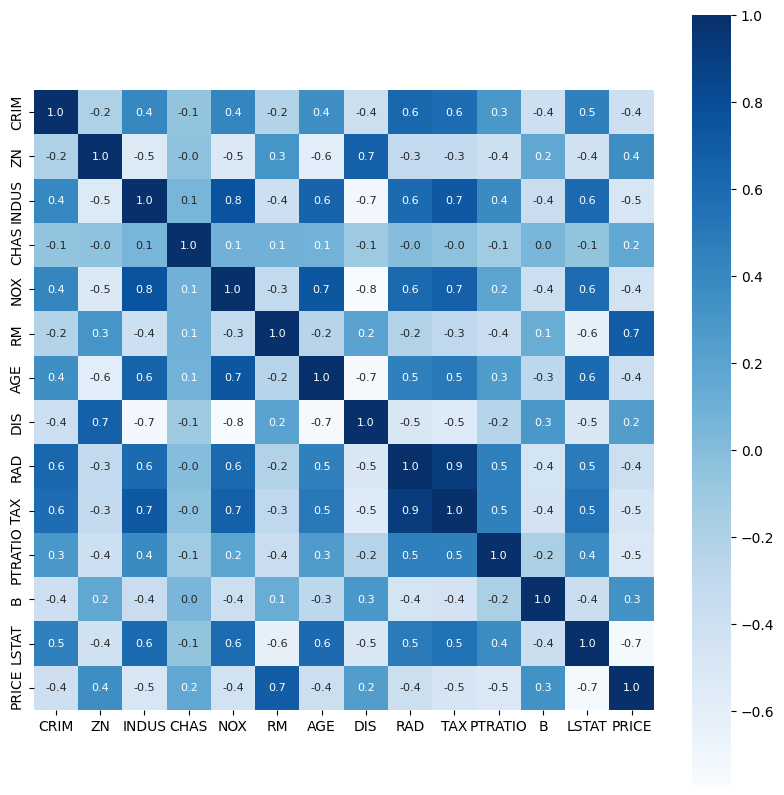

In [31]:
# constructing the heat map to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Splitting the data and target(price)

In [34]:
X=house_price_dataframe.drop(['PRICE'],axis=1)
Y=house_price_dataframe['PRICE']

In [35]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [36]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


Splitting the data into training data and Test data

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [38]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


Model training  

- The XGBoost Regressor is an advanced gradient boosting model optimized for performance and speed. It is commonly used for regression tasks, including house price prediction, stock price forecasting, and more.   

- XGBoost Regressor is a powerful model for handling regression tasks where the target variable is continuous (not categorical).   

Here we use for  

🏡 House Price Prediction  

Predicting house prices based on features like area, location, and amenities.  

XGBoost handles large datasets efficiently and captures complex relationships.     

📊 When Should You Avoid XGBoost?  
🔴 If the dataset is very small → Simpler models like Linear Regression may work better.  
🔴 If your data is mostly categorical → Consider Decision Trees or Random Forest first.   
🔴 If interpretability is important → XGBoost is complex and harder to interpret than simpler models.   


In [41]:
# loading the model
model=XGBRegressor()

In [42]:
# training a model with X_train
model.fit(X_train , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluating the model

prediction on training data

In [52]:
# accuracy for prediction on training data
training_data_prediction=model.predict(X_train)

In [53]:
print(training_data_prediction)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12

In [62]:
# R squared error

score_training_1=metrics.r2_score(Y_train,training_data_prediction)

# Mean absolute error

score_training_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R squared error on training data",score_training_1)

print("Mean absolute error on training data : ",score_training_2)


R squared error on training data 0.9999980039471451
Mean absolute error on training data :  0.0091330346494618


✅ Good R² Range for a Model  
🔵 0.90 - 1.00 → Excellent Model (Explains 90-100% of the variance)

Example: Well-defined physics equations, high-quality financial models.

🟢 0.75 - 0.89 → Good Model (Explains 75-89% of the variance)

Example: House price prediction, credit scoring.

🟡 0.50 - 0.74 → Moderate Model (Explains 50-74% of the variance)

Example: Stock market forecasting, where data is noisy.

🔴 < 0.50 → Poor Model (Explains less than 50% of the variance)

Your model is not performing well and may need improvement.



 Here model's R² score is 0.999998, which is extremely high! This means that our model explains 99.9998% of the variance in the target variable.

Mean Absolute Error (MAE) is 0.0091, which is extremely low! This means that, on average, our model’s predictions deviate by only 0.0091 units from the actual values.

Visulaizing the actual Prices and Prediction Price

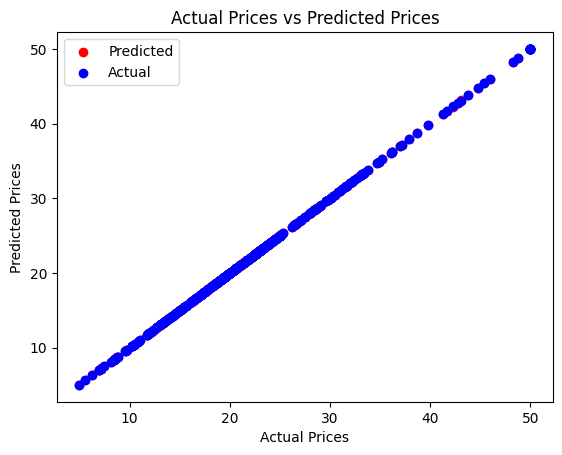

In [64]:
plt.scatter(Y_train, training_data_prediction, c='red', label="Predicted")  # Red for predicted
plt.scatter(Y_train, Y_train, c='blue', label="Actual")  # Blue for actual

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()  # Show legend to differentiate colors
plt.show()


**Now predicting for test data **

In [57]:
# test data prediction
test_data_prediction=model.predict(X_test)

In [60]:
# R squared error

score_test_1=metrics.r2_score(Y_test,test_data_prediction)

# Mean absolute error

score_test_2=metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R squared error on test data",score_test_1)

print("Mean absolute error on test data : ",score_test_2)

R squared error on test data 0.9051721149855378
Mean absolute error on test data :  2.0748727686264927


Visulazing the actual and predicted price on test data

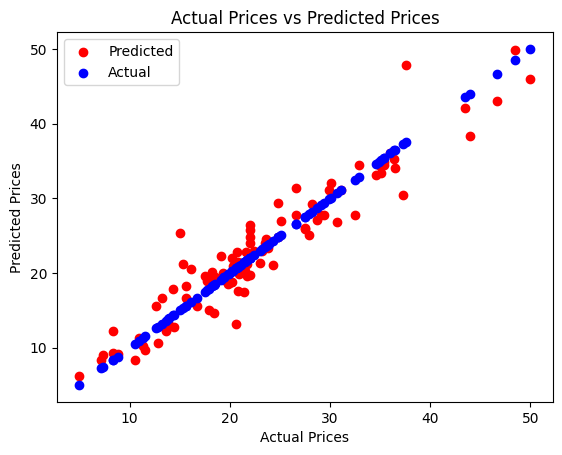

In [65]:
plt.scatter(Y_test, test_data_prediction, c='red', label="Predicted")  # Red for predicted
plt.scatter(Y_test, Y_test, c='blue', label="Actual")  # Blue for actual

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()  # Show legend to differentiate colors
plt.show()